In [40]:
import pyforest
for i in dir(pyforest):
    print(i)

ARIMA
CountVectorizer
ElasticNet
ElasticNetCV
GradientBoostingClassifier
GradientBoostingRegressor
GridSearchCV
Image
KFold
KMeans
LabelEncoder
Lasso
LassoCV
LazyImport
LinearRegression
LogisticRegression
MinMaxScaler
OneHotEncoder
PCA
Path
PolynomialFeatures
Prophet
RandomForestClassifier
RandomForestRegressor
RandomizedSearchCV
Ridge
RidgeCV
RobustScaler
SimpleImputer
SparkContext
StandardScaler
StratifiedKFold
TSNE
TfidfVectorizer
__builtins__
__cached__
__doc__
__file__
__loader__
__name__
__package__
__path__
__spec__
__version__
_importable
_imports
_jupyter_labextension_paths
_jupyter_nbextension_paths
active_imports
alt
bokeh
cross_val_score
cv2
dash
dd
dt
fastai
fbprophet
gensim
get_user_symbols
glob
go
import_symbol
imutils
install_extensions
install_labextension
install_nbextension
keras
lazy_imports
lgb
load_workbook
metrics
mpl
nltk
np
open_workbook
os
pd
pickle
plt
px
py
pydot
pyforest_imports
re
sg
skimage
sklearn
sm
sns
spacy
statistics
stats
svm
sys
textblob
tf
torch
t

In [41]:
df=pd.read_csv("bike-sharing-data.csv")

<IPython.core.display.Javascript object>

In [42]:

df['datetime'] = df['datetime'].astype('datetime64')

In [43]:
df['weekday'] = df['datetime'].dt.day_name()
df['month'] = df['datetime'].dt.month_name()
df['hour'] = df['datetime'].dt.hour

In [44]:
df.drop('datetime', axis='columns', inplace=True)

In [45]:
df.drop('registered', axis=1, inplace=True)

In [46]:
df.drop('temp', axis=1, inplace=True)

In [47]:
days = pd.get_dummies(df['weekday'], drop_first=True)

<IPython.core.display.Javascript object>

In [48]:
df = pd.concat([df, days], axis=1)

<IPython.core.display.Javascript object>

In [49]:
X = df.drop(['weekday', 'month', 'count'], axis='columns')

In [50]:
y = df['count']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

<IPython.core.display.Javascript object>

In [52]:
lr = LinearRegression()

<IPython.core.display.Javascript object>

In [53]:
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
lr.score(X_test, y_test)

0.5964041437559409

In [55]:
lr.predict(X_test)

array([214.91788452,   7.44884278, 130.51378259, ..., 451.84820829,
       -21.18021403, 201.5265872 ])

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score


In [57]:
def plot_scores(model,X_train,y_train):
    """
    Functon to plot scores RMSE, MAE, R^2, RMSLE from model.
    
    Inputs
    -------
    - model: a trained model
    - X_train: X_train or X_test DataFrame/Series
    - y_train: y_train or y_test DataFrame/Series
    
    
    """

    assert(y_train.shape[0] == X_train.shape[0])
    
    print("Model parameters ", model.__class__.__name__)
    prediction_train = model.predict(X_train)
    print("Root Mean Squared Error: " + str(np.sqrt(mean_squared_error(y_train, prediction_train))))
    print("Mean Absolute Error: " + str(mean_absolute_error(y_train, prediction_train)))
    print("R^2 Coefficient of Determination: " + str(r2_score(y_train, prediction_train)))
   


In [58]:
plot_scores(lr,X_train,y_train)

Model parameters  LinearRegression


<IPython.core.display.Javascript object>

Root Mean Squared Error: 117.73277779832627
Mean Absolute Error: 82.48027849189536
R^2 Coefficient of Determination: 0.5769067586743007


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

best k: 10  with r2_score =  0.6757423394837181


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

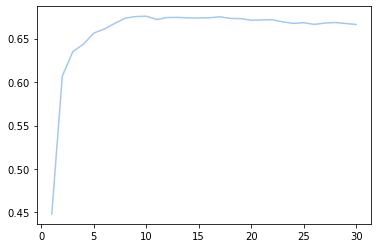

In [59]:
from sklearn.neighbors import KNeighborsRegressor

# lets do this with trial and error for finding the best k
acc = [] # accuracy per k (by accuracy i mean r2_score)
max_r2 = 0
best_k = 0
for k in range(1,31):
    knr = KNeighborsRegressor(n_neighbors = k)
    knr.fit(X_train , y_train)
    knr_pred = knr.predict(X_test)
    r2 = metrics.r2_score(y_test , knr_pred)
    acc.append(r2)
    if r2 > max_r2:
        max_r2 = r2
        best_k = k

print("best k:",best_k , " with r2_score = " , max_r2)
plt.plot(np.arange(1,31) , acc)

In [60]:
plot_scores(knr,X_train,y_train)

Model parameters  KNeighborsRegressor


<IPython.core.display.Javascript object>

Root Mean Squared Error: 104.5201198323939
Mean Absolute Error: 69.24942964323992
R^2 Coefficient of Determination: 0.6665420285410203


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

best min_samples_leaf: 15  with r2_score =  0.8970700837708703


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

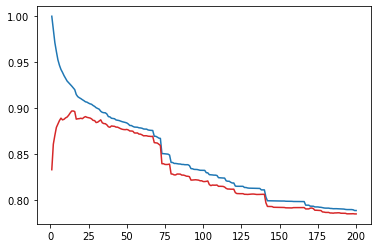

In [61]:
from sklearn.tree import DecisionTreeRegressor

# lets find the best min_samples_leaf with trial and error
acc_test = [] # accuracy per k (by accuracy i mean r2_score)
acc_train = []
max_r2_test = 0
best_k_test = 0
for k in range(1,201):
    rt = DecisionTreeRegressor(min_samples_leaf = k , random_state = 1)
    rt.fit(X_train , y_train)
    rt_pred_train = rt.predict(X_train)
    rt_pred_test = rt.predict(X_test)
    r2_train = metrics.r2_score(y_train , rt_pred_train)
    r2_test = metrics.r2_score(y_test , rt_pred_test)
    acc_test.append(r2_test)
    acc_train.append(r2_train)
    if r2_test > max_r2_test:
        max_r2_test = r2_test
        best_k_test = k

print("best min_samples_leaf:",best_k_test , " with r2_score = " , max_r2_test)
plt.plot(np.arange(1,201) , acc_train , color = 'tab:blue')
plt.plot(np.arange(1,201) , acc_test , color = 'tab:red')

In [62]:
rt=DecisionTreeRegressor(min_samples_leaf = best_k_test , random_state = 1)

In [63]:
rt.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=15, random_state=1)

In [64]:
plot_scores(rt,X_test,y_test)

Model parameters  DecisionTreeRegressor


<IPython.core.display.Javascript object>

Root Mean Squared Error: 58.287229678279196
Mean Absolute Error: 37.86288839985741
R^2 Coefficient of Determination: 0.8970700837708703


In [65]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train).score(X_test, y_test)

<IPython.core.display.Javascript object>

0.9129812820777505

In [66]:
y_pred_rf=rf.predict(X_test)

In [67]:
plot_scores(rf,X_test,y_test)

Model parameters  RandomForestRegressor


<IPython.core.display.Javascript object>

Root Mean Squared Error: 53.593108153170185
Mean Absolute Error: 34.1969898989899
R^2 Coefficient of Determination: 0.9129812820777505


In [68]:
sns.color_palette("pastel")
sns.set_palette('pastel')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
sns.set_palette('pastel')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\oezkan\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

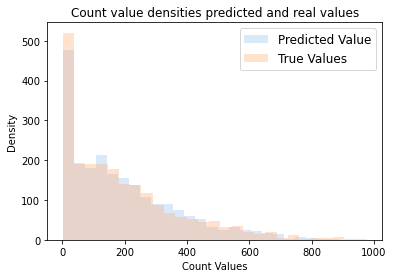

In [70]:



sns.distplot(y_pred_rf, kde=False, label='Predicted Value')
sns.distplot(y_test.values, kde=False,label = 'True Values')
plt.xlabel('Count Values')
plt.ylabel('Density')
plt.legend(prop={'size': 12})


plt.title('Count value densities predicted and real values')

fig = plt.gcf()
fig.savefig('pre_tru11.png')
plt.show()
